# Librerias

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from keras.datasets import boston_housing
from keras import layers, models, optimizers, Input

# Preparando datos

In [8]:
(train_data, train_labels), (test_data, test_labels) = boston_housing.load_data()

In [9]:
train_data.shape, test_data.shape

((404, 13), (102, 13))

In [10]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std

test_data -= mean
test_data /= std

In [21]:
def build_model_regression(lr, input_data):  

    model = models.Sequential()

    model.add(Input(shape=(input_data,)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))

    model.compile(optimizer=optimizers.RMSprop(learning_rate=lr), loss='mse', metrics=['mae'])

    return model

In [34]:
k = 4

num_val_samples = len(train_data) // k
num_epochs = 500
all_history = []

In [35]:
for i in range(k):
    print("Fold: ", i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_labels[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate([train_data[:i * num_val_samples], train_data[(i + 1) * num_val_samples:]], axis=0)
    partial_train_targets = np.concatenate([train_labels[:i * num_val_samples], train_labels[(i + 1) * num_val_samples:]], axis=0)

    model = build_model_regression(0.001, 13)
    history = model.fit(partial_train_data, partial_train_targets, epochs=num_epochs, batch_size=16, validation_data=(val_data, val_targets), verbose=0)
    all_history.append(history.history['val_mae'])

Fold:  0
Fold:  1
Fold:  2
Fold:  3


In [40]:
all_mae_avg = np.array(all_history).mean(axis=0)

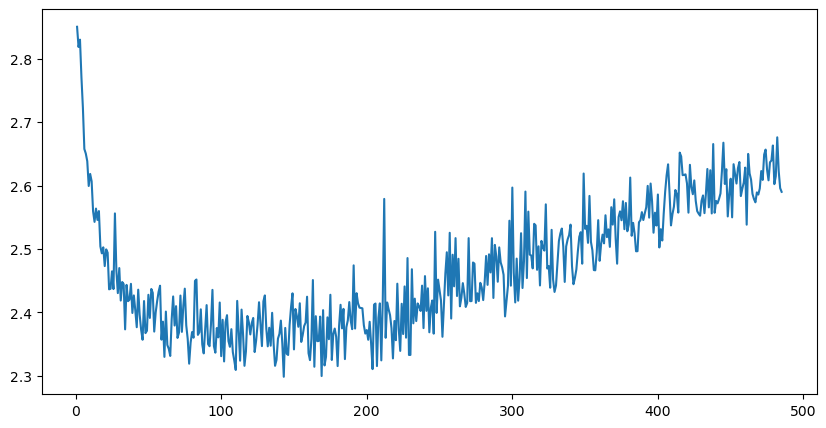

In [44]:
fig = plt.figure(figsize=(10, 5))
plt.plot(range(1, len(all_mae_avg[15:])+1 ), all_mae_avg[15:], label='Validation MAE')
plt.show()

In [ ]:
model.evaluate(test_data, test_labels)